In [1]:
!pip install pingouin
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import seaborn as sns
import pingouin as pg
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

  Obtaining dependency information for pingouin from https://files.pythonhosted.org/packages/eb/56/6d3607f3a78aee1de8e5466f5171722c8e344266a12dc44ccb73d024b3b3/pingouin-0.5.5-py3-none-any.whl.metadata
  Obtaining dependency information for pandas-flavor from https://files.pythonhosted.org/packages/5d/e6/71ed4d95676098159b533c4a4c424cf453fec9614edaff1a0633fe228eef/pandas_flavor-0.7.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/204.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/204.4 kB ? eta -:--:--
   ------------- ------------------------- 71.7/204.4 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 204.4/204.4 kB 2.1 MB/s eta 0:00:00


In [2]:
df = pd.read_excel('movie_data.xlsx')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
columns_with_na = ['released', 'score', 'votes','writer', 'star', 'country','runtime','company']
df = df.dropna(axis=0, subset = columns_with_na)
df.isna().sum()

name           0
rating        69
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2157
gross        179
company        0
runtime        0
dtype: int64

In [6]:
imputer = SimpleImputer(strategy="most_frequent")
df['rating'] = imputer.fit_transform(df[['rating']]).ravel()

mean_value_budget = df['budget'].mean()
mean_value_gross = df['gross'].mean()
df['budget'].fillna(value=mean_value_budget, inplace=True)
df['gross'].fillna(value=mean_value_gross, inplace=True)

df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7643 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7643 non-null   object 
 1   rating    7643 non-null   object 
 2   genre     7643 non-null   object 
 3   year      7643 non-null   int64  
 4   released  7643 non-null   object 
 5   score     7643 non-null   float64
 6   votes     7643 non-null   float64
 7   director  7643 non-null   object 
 8   writer    7643 non-null   object 
 9   star      7643 non-null   object 
 10  country   7643 non-null   object 
 11  budget    7643 non-null   float64
 12  gross     7643 non-null   float64
 13  company   7643 non-null   object 
 14  runtime   7643 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 955.4+ KB
None


In [9]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7643 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7643 non-null   object 
 1   rating    7643 non-null   object 
 2   genre     7643 non-null   object 
 3   year      7643 non-null   int64  
 4   released  7643 non-null   object 
 5   score     7643 non-null   float64
 6   votes     7643 non-null   int64  
 7   director  7643 non-null   object 
 8   writer    7643 non-null   object 
 9   star      7643 non-null   object 
 10  country   7643 non-null   object 
 11  budget    7643 non-null   int64  
 12  gross     7643 non-null   int64  
 13  company   7643 non-null   object 
 14  runtime   7643 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 955.4+ KB
None


In [11]:
df['genre_encoded'] = pd.factorize(df['genre'])[0]
print(df[['genre', 'genre_encoded']].head())

       genre  genre_encoded
0      Drama              0
1  Adventure              1
2     Action              2
3     Comedy              3
4     Comedy              3


In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,genre_encoded
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,2
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,3
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,3


In [13]:
final_data = df[['genre_encoded','year','score','votes','budget','gross','runtime']]

In [14]:
final_data.head()

,genre_encoded,year,score,votes,budget,gross,runtime
0,0,1980,8.4,927000,19000000,46998772,146
1,1,1980,5.8,65000,4500000,58853106,104
2,2,1980,8.7,1200000,18000000,538375067,124
3,3,1980,7.7,221000,3500000,83453539,88
4,3,1980,7.3,108000,6000000,39846344,98


# Correlation Analysis

In [15]:
print(final_data[['budget', 'gross']].corr())

          budget     gross
budget  1.000000  0.711538
gross   0.711538  1.000000


In [16]:
print(final_data[['budget', 'votes']].corr())

          budget     votes
budget  1.000000  0.420751
votes   0.420751  1.000000


In [17]:
print(final_data[['votes', 'gross']].corr())

          votes     gross
votes  1.000000  0.628735
gross  0.628735  1.000000


In [18]:
partial_corr= pg.partial_corr(data=final_data, x='budget', y='gross', covar='votes')
print(partial_corr)

            n         r         CI95%  p-val
pearson  7643  0.633645  [0.62, 0.65]    0.0


In [19]:
print(final_data[['votes', 'runtime']].corr())

            votes   runtime
votes    1.000000  0.308907
runtime  0.308907  1.000000


In [20]:
print(final_data[['runtime', 'score']].corr())

          runtime     score
runtime  1.000000  0.399965
score    0.399965  1.000000


In [21]:
print(final_data[['votes', 'score']].corr())

          votes     score
votes  1.000000  0.409432
score  0.409432  1.000000


In [22]:
data= final_data[['votes', 'runtime','score']]

X2 = data[['votes', 'runtime']]
y2 = data['score']

model2 = LinearRegression().fit(X2, y2)
r_squared2 = model2.score(X2, y2)
multiple_R2 = np.sqrt(r_squared2)

print(f"Multiple Correlation Coefficient (R): {multiple_R2:.3f}")

Multiple Correlation Coefficient (R): 0.500


In [23]:
final_data.corr(method = 'pearson')

,genre_encoded,year,score,votes,budget,gross,runtime
genre_encoded,1.000000,0.038524,0.035097,0.025372,0.053900,0.094780,-0.150000
year,0.038524,1.000000,0.098278,0.223353,0.267135,0.252422,0.119789
score,0.035097,0.098278,1.000000,0.409432,0.064176,0.182861,0.399965
votes,0.025372,0.223353,0.409432,1.000000,0.420751,0.628735,0.308907
budget,0.053900,0.267135,0.064176,0.420751,1.000000,0.711538,0.265068
gross,0.094780,0.252422,0.182861,0.628735,0.711538,1.000000,0.241290
runtime,-0.150000,0.119789,0.399965,0.308907,0.265068,0.241290,1.000000


In [24]:
final_data.corr(method = 'spearman')

,genre_encoded,year,score,votes,budget,gross,runtime
genre_encoded,1.000000,0.004627,-0.018707,0.018347,-0.067601,0.041009,-0.173932
year,0.004627,1.000000,0.098835,0.471276,0.204703,0.266666,0.141981
score,-0.018707,0.098835,1.000000,0.428206,0.004518,0.117897,0.399672
votes,0.018347,0.471276,0.428206,1.000000,0.234772,0.690201,0.288562
budget,-0.067601,0.204703,0.004518,0.234772,1.000000,0.363933,0.228232
gross,0.041009,0.266666,0.117897,0.690201,0.363933,1.000000,0.227287
runtime,-0.173932,0.141981,0.399672,0.288562,0.228232,0.227287,1.000000


# Correlation Checked by heatmap

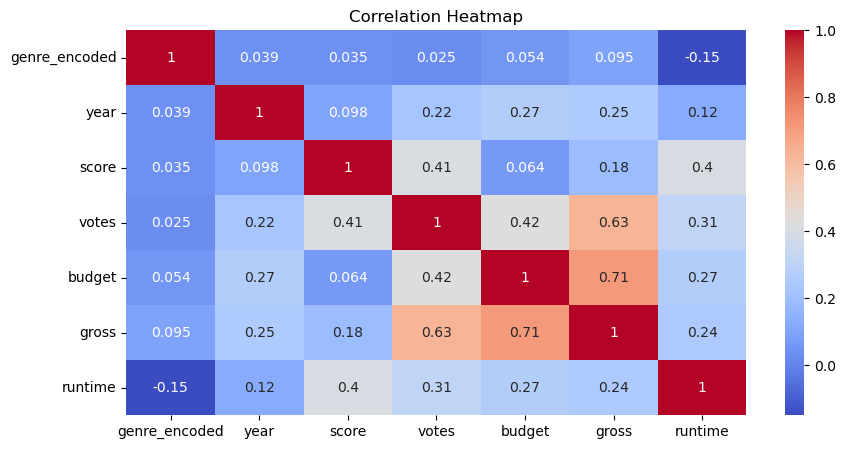

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(final_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Correlation Checked by Scatter Plot

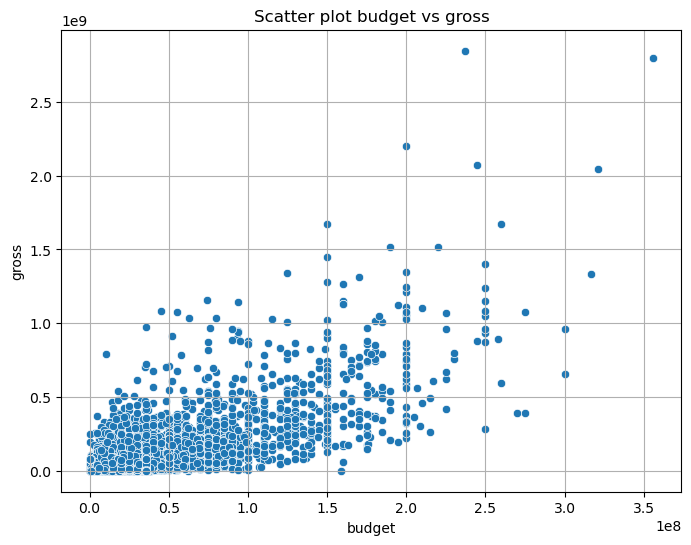

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=final_data['budget'], y=final_data['gross'])
plt.title("Scatter plot budget vs gross")
plt.xlabel("budget")
plt.ylabel("gross")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Scatter Plot with Regression Line: Budget vs. Gross Earnings')

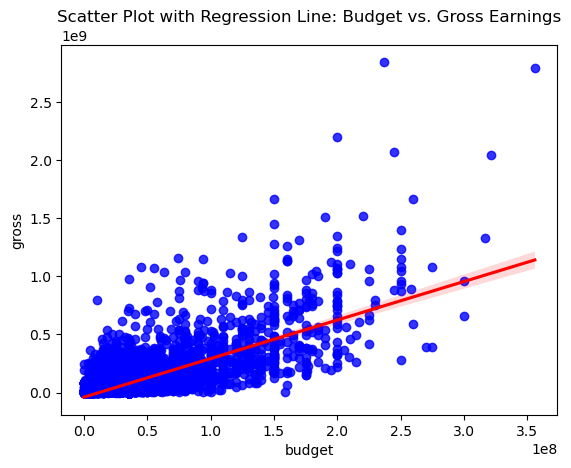

In [27]:
sns.regplot(x = 'budget', y = 'gross', data= final_data , scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})

plt.title('Scatter Plot with Regression Line: Budget vs. Gross Earnings')

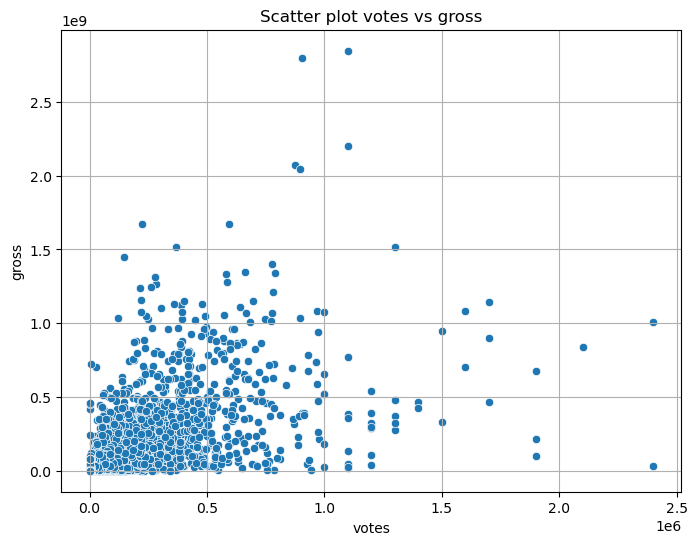

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=final_data['votes'], y=final_data['gross'])
plt.title("Scatter plot votes vs gross")
plt.xlabel("votes")
plt.ylabel("gross")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Scatter Plot with Regression Line: votes vs. Gross Earnings')

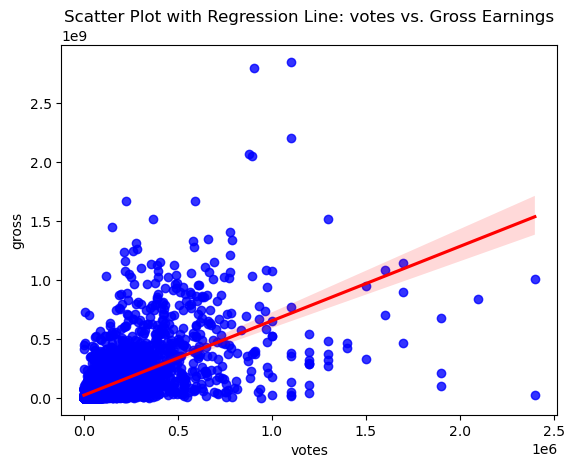

In [29]:
sns.regplot(x = 'votes', y = 'gross', data= final_data , scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})
plt.title('Scatter Plot with Regression Line: votes vs. Gross Earnings')

Text(0.5, 1.0, 'Scatter Plot with Regression Line: gross vs. Gross Earnings')

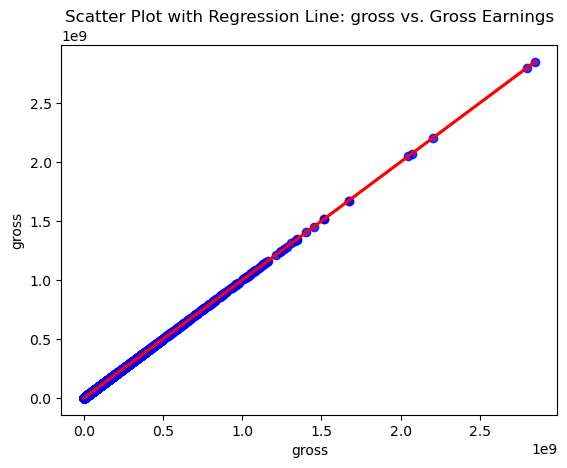

In [30]:
sns.regplot(x = 'gross', y = 'gross', data= final_data , scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})
plt.title('Scatter Plot with Regression Line: gross vs. Gross Earnings')

Text(0.5, 1.0, 'Scatter Plot with Regression Line: votes vs. budget')

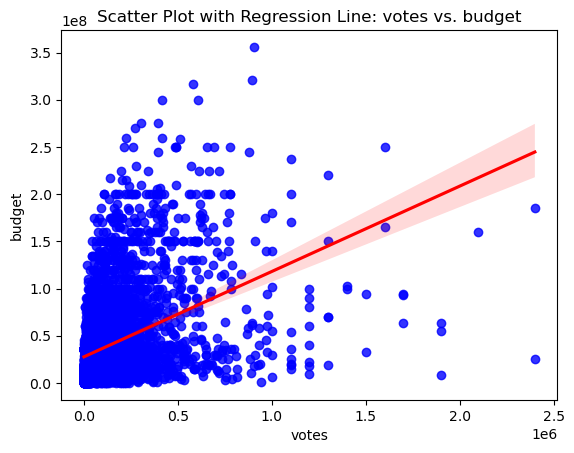

In [31]:
sns.regplot(x = 'votes', y = 'budget', data= final_data , scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})
plt.title('Scatter Plot with Regression Line: votes vs. budget')

Text(0.5, 1.0, 'Scatter Plot with Regression Line: score vs. votes')

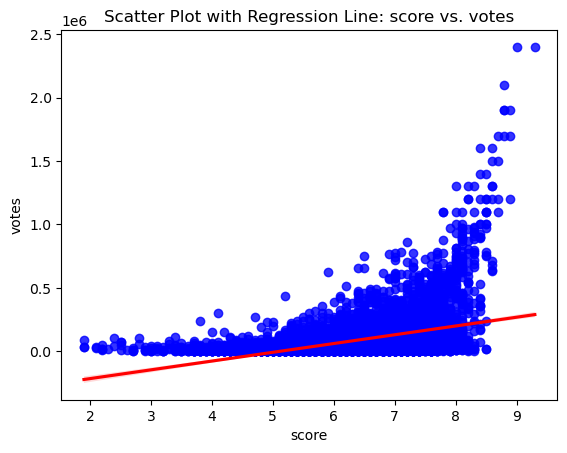

In [32]:
sns.regplot(x = 'score', y = 'votes', data= final_data , scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})
plt.title('Scatter Plot with Regression Line: score vs. votes')

Text(0.5, 1.0, 'Scatter Plot with Regression Line: score vs. votes')

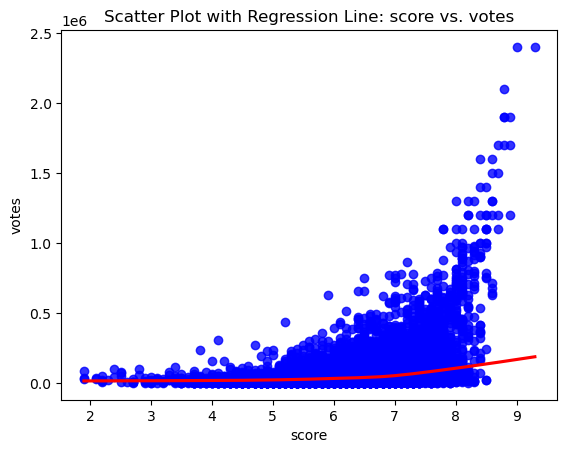

In [33]:
sns.regplot(
    x='score',
    y='votes',
    data=final_data,
    scatter_kws={'color': 'blue'},
    line_kws={'color': 'red'},
    lowess=True)
plt.title('Scatter Plot with Regression Line: score vs. votes')

Text(0.5, 1.0, 'Scatter Plot with Regression Line: runtime vs. genre_encoded')

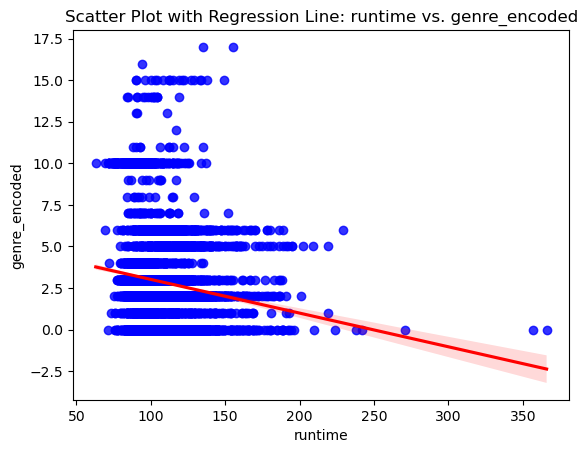

In [34]:
sns.regplot(x = 'runtime', y = 'genre_encoded', data= final_data , scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})
plt.title('Scatter Plot with Regression Line: runtime vs. genre_encoded')

Text(0.5, 1.0, 'Scatter Plot with Regression Line: runtime vs. genre_encoded')

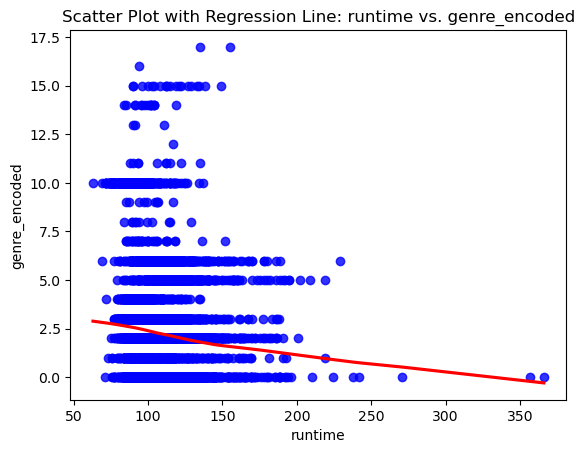

In [35]:
sns.regplot(x = 'runtime', y = 'genre_encoded', data= final_data , scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'},lowess=True)
plt.title('Scatter Plot with Regression Line: runtime vs. genre_encoded')

Text(0.5, 1.0, 'Scatter Plot with Regression Line: score vs. genre_encoded')

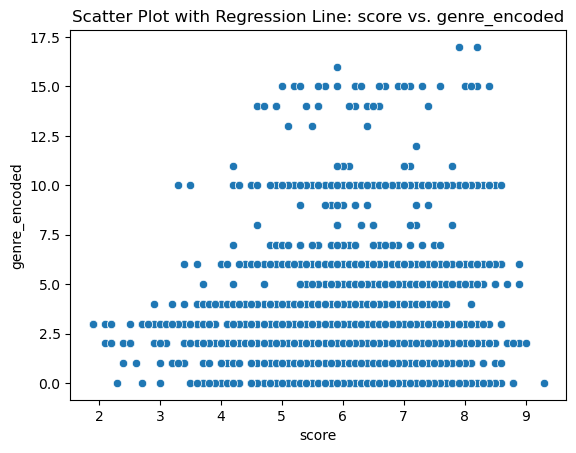

In [36]:
sns.scatterplot(x = 'score', y = 'genre_encoded', data= final_data )
plt.title('Scatter Plot with Regression Line: score vs. genre_encoded')